In [37]:
# Import the libraries
# Importando as bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [38]:
# Loading the Data
# Carregando os dados 
import os

PATH = os.path.join("datasets", "palestine_data")

def load_data(path=PATH):
    csv_path = os.path.join(path, "Palestine.csv")
    return pd.read_csv(csv_path)

In [39]:
counter_data = load_data()

#Retirando Dados Indiferentes à contagem (meses, soma total, linhas nulas)
#Removing Count-Indifferent Data (months, sum, null lines)
counter_data = counter_data.drop('Month', axis = 1)
counter_data = counter_data.drop(counter_data.tail(2).index,inplace=False)

#Substituir todas as linhas com brancos ou nada por 0
#Replace all blank or NaN lines with 0
counter_data = counter_data.fillna(0)

#Para cada coluna substitui os possíveis valores de string por 0 
#For each column replace possible string values with 0
counter_data['Palestinians Injuries'] = (pd.to_numeric(counter_data['Palestinians Injuries'],errors='coerce').fillna(0))
counter_data['Israelis Injuries'] = (pd.to_numeric(counter_data['Israelis Injuries'],errors='coerce').fillna(0))
counter_data['Palestinians Killed'] = (pd.to_numeric(counter_data['Palestinians Killed'],errors='coerce').fillna(0))
counter_data['Israelis Killed'] = (pd.to_numeric(counter_data['Israelis Killed'],errors='coerce').fillna(0))

# Visualization of the head data
# Visualização do início dos dados
counter_data = counter_data.astype(int)
counter_data.head()

,Year,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,781,0,51,8
1,2000,3838,0,112,22
2,2000,5984,0,104,10
3,2000,0,0,16,1
4,2001,304,0,67,36


In [40]:
#Agrupando os dados dos anos semelhantes e efetuando a soma das linhas
#Grouping data from similar years and summing the lines
counter_data = counter_data.groupby('Year').sum()
counter_data = counter_data.reset_index()

#Resultado
#Result
counter_data.head()

,Year,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,10603,0,283,41
1,2001,6386,0,470,192
2,2002,4382,0,1032,419
3,2003,2992,0,588,185
4,2004,4009,0,786,104


In [41]:
#Transformando Dataframes em arrays para usar posteriormente
#Transforming Dataframes into Arrays for later use
x = counter_data['Year'].to_numpy()
y_1 = counter_data['Palestinians Injuries'].to_numpy()
y_2 = counter_data['Israelis Injuries'].to_numpy()

w_1 = counter_data['Palestinians Killed'].to_numpy()
w_2 = counter_data['Israelis Killed'].to_numpy()

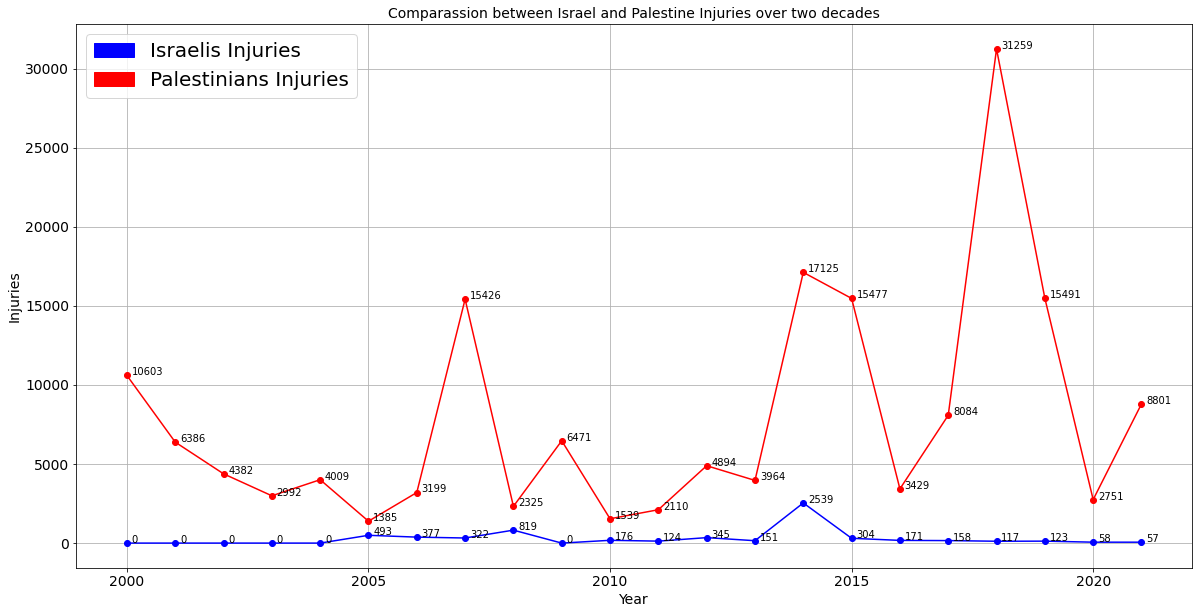

In [42]:
#Ajustando tamanho da figura
#Adjusting figure size
plt.figure(figsize=(20, 10))

#Configurações iniciais dos títulos e eixos do gráfico
#Initial settings of chart titles and axes
ax = plt.gca()
ax.set_title('Comparassion between Israel and Palestine Injuries over two decades', fontsize=14)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Injuries',fontsize=14)

#Criando os pontos e as linhas do gráfico
#Creating the points and lines of the graph
counter_data.plot(kind='line',x='Year',y='Palestinians Injuries', color='red',marker='o' ,ax=ax, fontsize=14)
counter_data.plot(kind='line',x='Year',y='Israelis Injuries', color='blue',marker='o', ax=ax, fontsize=14)

#Legenda do Gráfico
#Graph Legend
israelis_injuries = mpatches.Patch(color='blue', label='Israelis Injuries')
palestinians_injuries = mpatches.Patch(color='red', label='Palestinians Injuries')
plt.legend(handles=[israelis_injuries,palestinians_injuries], fontsize=20)

#Usando os arrays obtidos para mostrar os valores em cada ponto do gráfico
#Using the obtained arrays to show the values at each point on the graph
for i,j in zip(x,y_1):
    ax.annotate(str(j),xy=(i+0.1,j+5))

for i,j in zip(x,y_2):
    ax.annotate(str(j),xy=(i+0.1,j+5))

#Visualização final do gráfico
#Final preview of the graph
plt.grid()
plt.show()

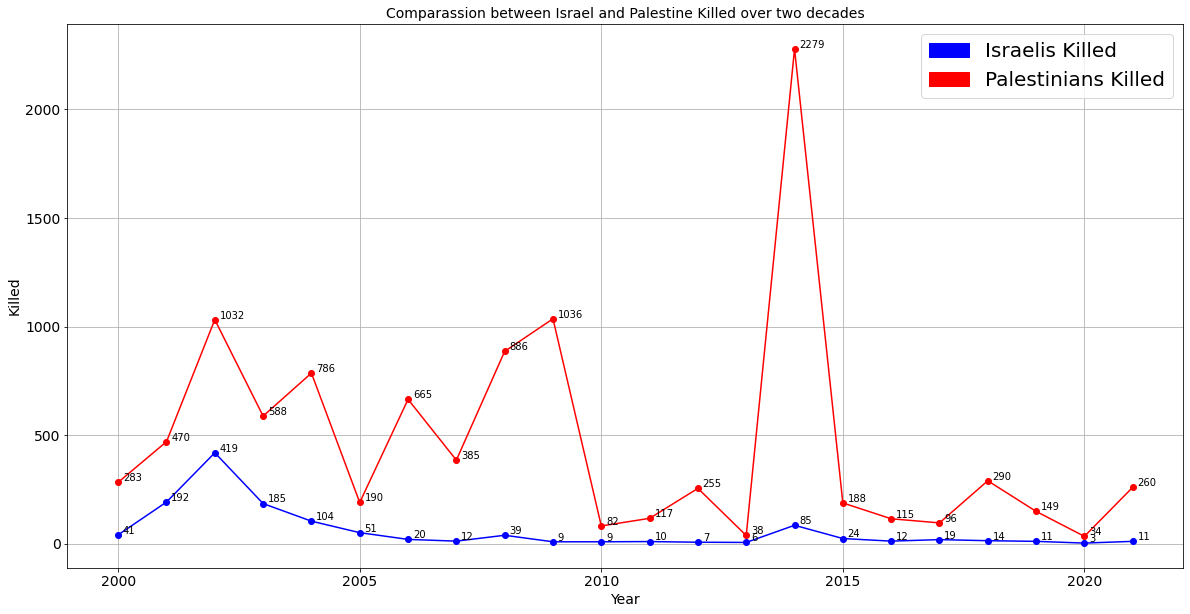

In [43]:
#Ajustando tamanho da figura
#Adjusting figure size
plt.figure(figsize=(20, 10))

#Configurações iniciais dos títulos e eixos do gráfico
#Initial settings of chart titles and axes
ax = plt.gca()
ax.set_title('Comparassion between Israel and Palestine Killed over two decades', fontsize=14)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Killed',fontsize=14)

#Criando os pontos e as linhas do gráfico
#Creating the points and lines of the graph
counter_data.plot(kind='line',x='Year',y='Palestinians Killed', color='red',marker='o' ,ax=ax, fontsize=14)
counter_data.plot(kind='line',x='Year',y='Israelis Killed', color='blue',marker='o', ax=ax, fontsize=14)

#Legenda do Gráfico
#Graph Legend
israelis_deaths = mpatches.Patch(color='blue', label='Israelis Killed')
palestinians_deaths = mpatches.Patch(color='red', label='Palestinians Killed')
plt.legend(handles=[israelis_deaths,palestinians_deaths], fontsize=20)

#Usando os arrays obtidos para mostrar os valores em cada ponto do gráfico
#Using the obtained arrays to show the values ​​at each point on the graph
for i,j in zip(x,w_1):
    ax.annotate(str(j),xy=(i+0.1,j+5))

for i,j in zip(x,w_2):
    ax.annotate(str(j),xy=(i+0.1,j+5))

#Visualização final do gráfico
#Final preview of the graph
plt.grid()
plt.show()

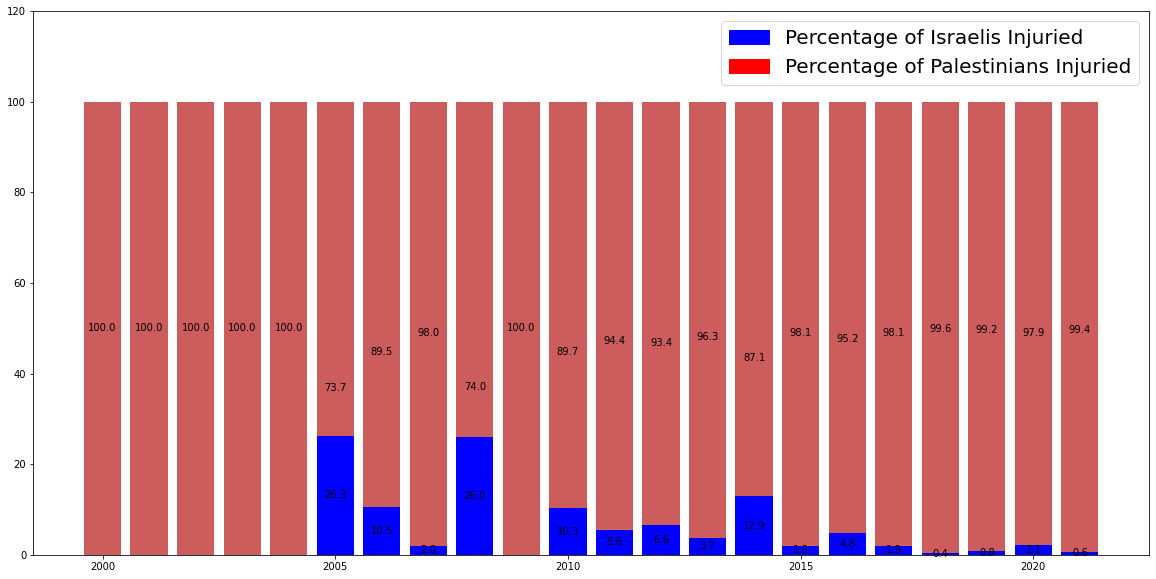

In [44]:
plt.figure(figsize=(20,10))
sum_injuries = y_1 + y_2

#Transformação para porcentagem e plotar barras
#Transform to percentage and plot bars
y_1 = y_1/sum_injuries*100
y_2 = y_2/sum_injuries*100
plt.ylim(0,120)
plt.bar(x, y_2, color='blue')
plt.bar(x, y_1 ,bottom=y_2, color='indianred')

#Legenda do gráfico
#Graphic subtitle
israelis_deaths = mpatches.Patch(color='blue', label='Percentage of Israelis Injuried')
palestinians_deaths = mpatches.Patch(color='red', label='Percentage of Palestinians Injuried')
plt.legend(handles=[israelis_deaths,palestinians_deaths], fontsize=20)

#Inserir números em cada barra
#Insert numbers into each bar
for xpos, ypos, yval in zip(x, y_1/2, y_1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
    

for xpos, ypos, yval in zip(x, y_2/2, y_2):
    if ypos>0:
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")

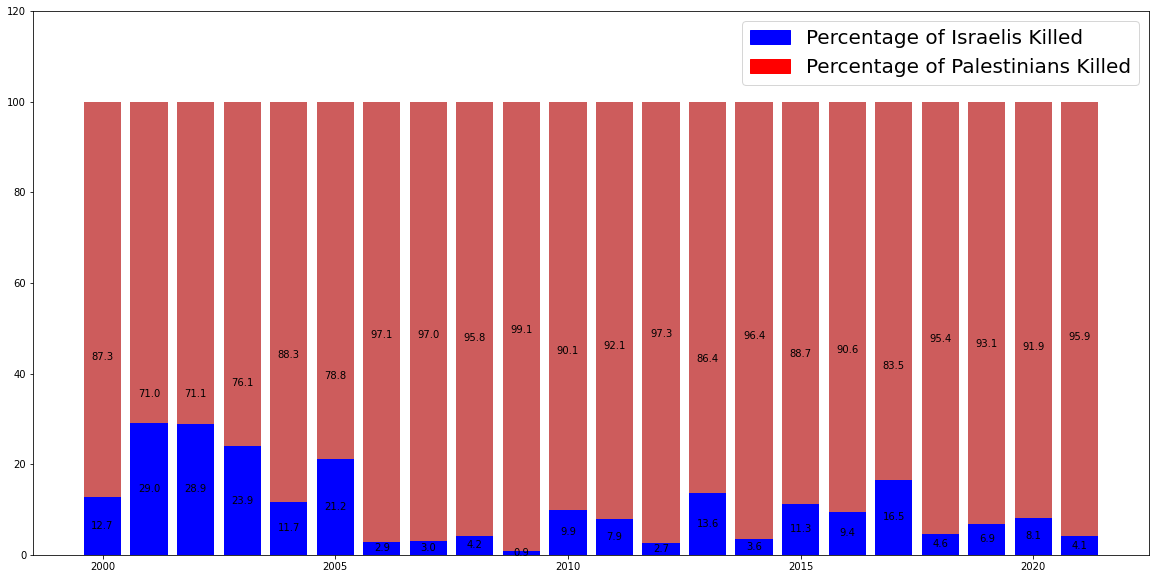

In [45]:
plt.figure(figsize=(20,10))
sum_killed = w_1 + w_2

#Transformação para porcentagem e plotar barras
#Transform to percentage and plot bars
w_1 = w_1/sum_killed*100
w_2 = w_2/sum_killed*100
plt.ylim(0,120)
plt.bar(x, w_2, color='blue')
plt.bar(x, w_1 ,bottom=w_2, color='indianred')

#Legenda do gráfico
#Graphic subtitle
israelis_deaths = mpatches.Patch(color='blue', label='Percentage of Israelis Killed')
palestinians_deaths = mpatches.Patch(color='red', label='Percentage of Palestinians Killed')
plt.legend(handles=[israelis_deaths,palestinians_deaths], fontsize=20)

#Inserir números em cada barra
#Insert numbers into each bar
for xpos, ypos, yval in zip(x, w_1/2, w_1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
    

for xpos, ypos, yval in zip(x, w_2/2, w_2):
    if ypos>0:
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")